In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
cDataset = pd.read_csv('Canadian Burned area pixels count.csv')
ecDataset = pd.read_csv('Eastern Canadian Burned area pixels count.csv')
ecDataset.index = pd.to_datetime(ecDataset['system:index'], format="%Y_%m_%d_%H")
cDataset.index = pd.to_datetime(cDataset['system:index'], format="%Y_%m_%d_%H")
ecDataset = ecDataset.drop(['system:index', '.geo'], axis=1)
cDataset = cDataset.drop(['system:index', '.geo'], axis=1)

dates = pd.to_datetime(ecDataset.index)
ecDataset2 = ecDataset.pivot_table(index=dates.month, columns=dates.year, values='count')
ecDataset2.index.names = ['Month']
cDataset2 = cDataset.pivot_table(index=dates.month, columns=dates.year, values='count')
cDataset2.index.names = ['Month']

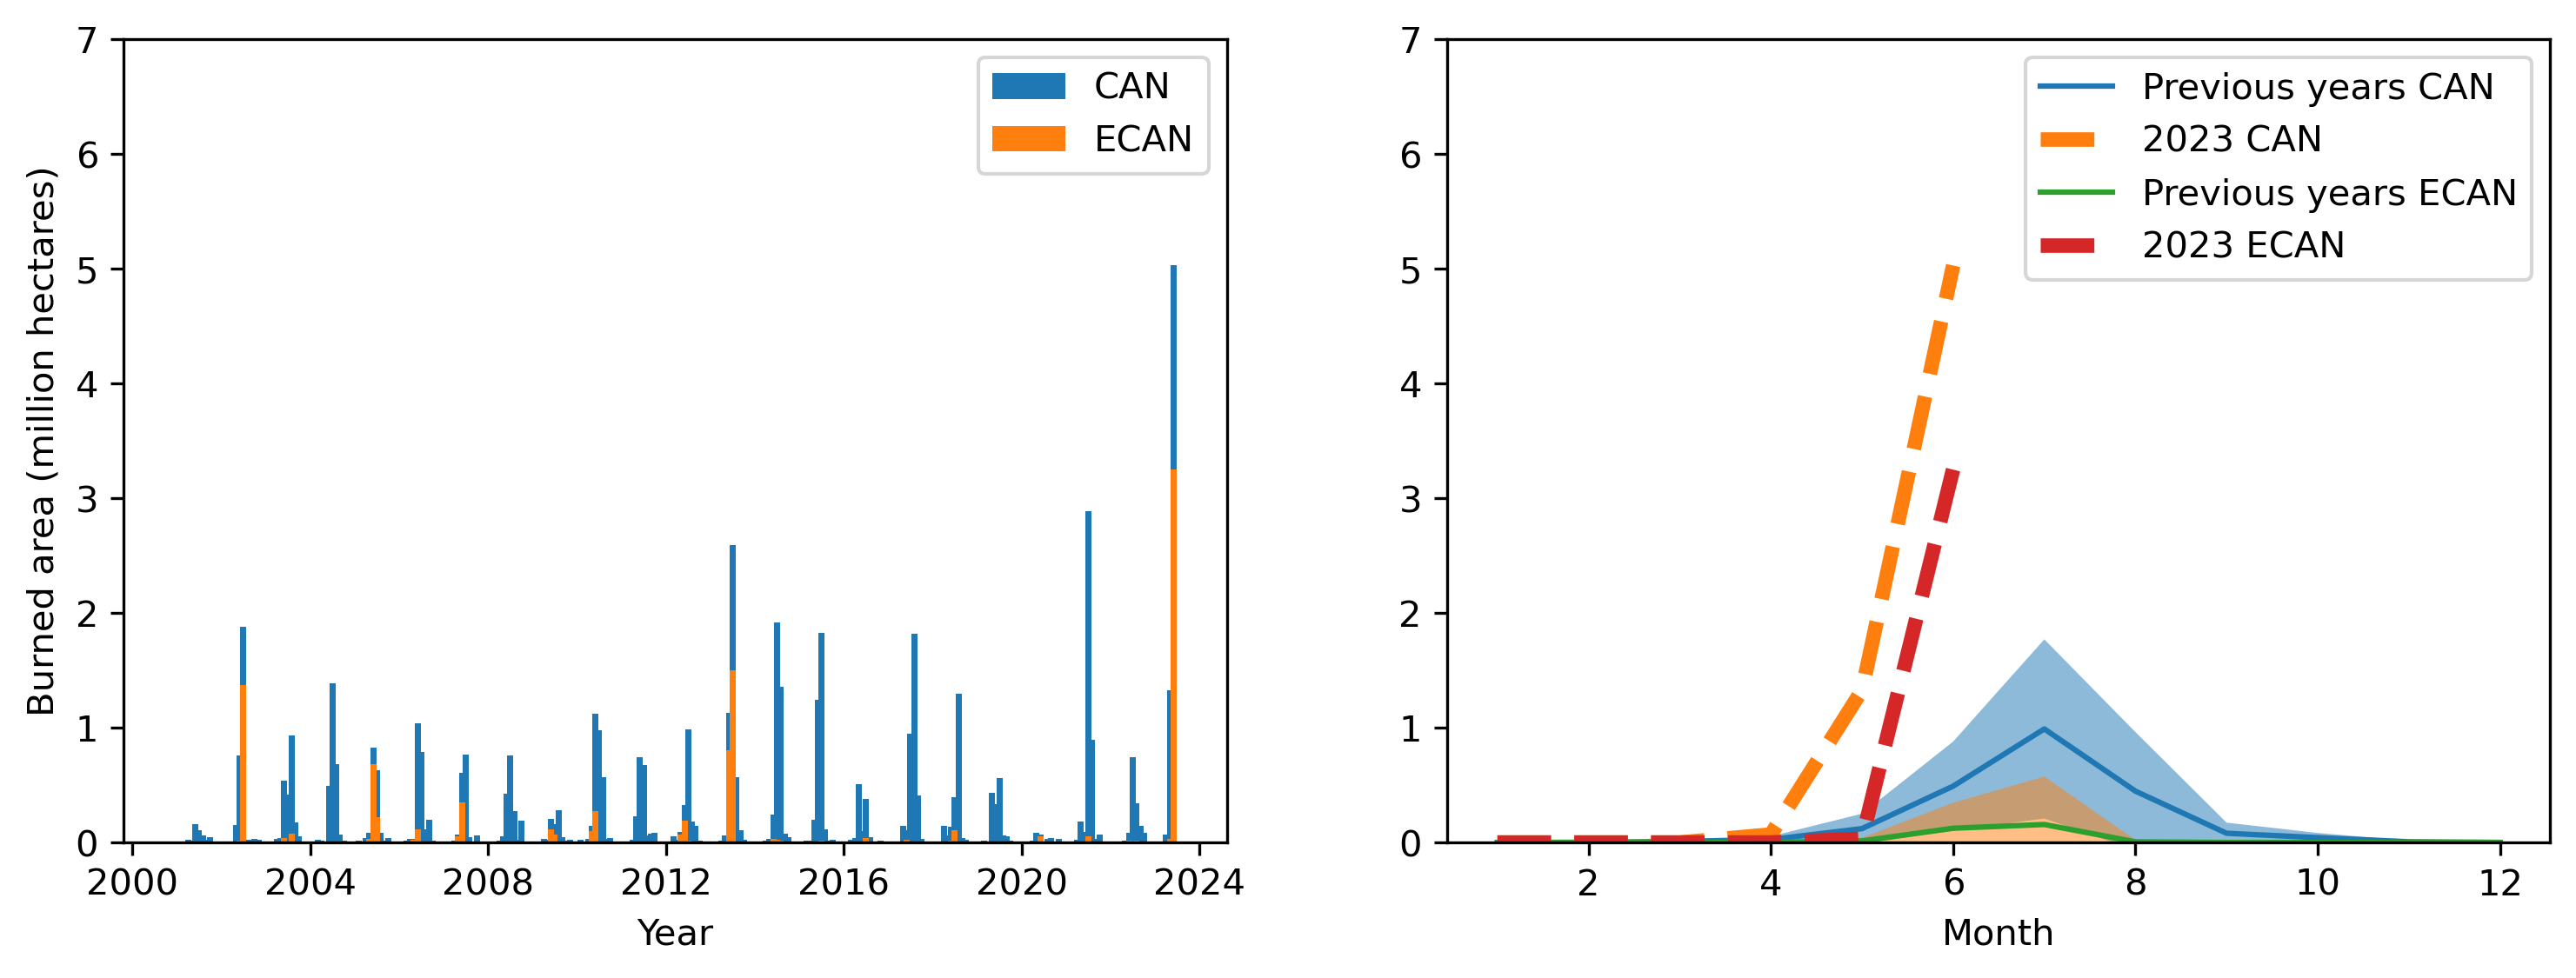

In [10]:
fig,ax = plt.subplots(1, 2, dpi=300, figsize=(12, 4))
ax[0].bar(ecDataset.index, cDataset['count']*500*500/10000/1e6, width=50, label='CAN')
ax[0].bar(ecDataset.index, ecDataset['count']*500*500/10000/1e6, width=50, label='ECAN')
ax[0].set_ylim(0, 7)
ax[0].set_ylabel('Burned area (million hectares)')
ax[0].set_xlabel('Year')
ax[0].legend()

c_mean = cDataset2.loc[:, 2001:2022].mean(axis=1)*500*500/10000/1e6
c_std = cDataset2.loc[:, 2001:2022].std(axis=1)*500*500/10000/1e6
c_mean.plot(ax=ax[1], legend=False, label='Previous years CAN')
(cDataset2[2023]*500*500/10000/1e6).plot(ax=ax[1],  label='2023 CAN', style='--', linewidth=4.0)
ax[1].fill_between(c_mean.index,c_mean.values - c_std.values, c_mean.values + c_std.values, alpha=0.5)

ec_mean = ecDataset2.loc[:, 2001:2022].mean(axis=1)*500*500/10000/1e6
ec_std = ecDataset2.loc[:, 2001:2022].std(axis=1)*500*500/10000/1e6
ec_mean.plot(ax=ax[1], legend=False, label='Previous years ECAN')
(ecDataset2[2023]*500*500/10000/1e6).plot(ax=ax[1],  label='2023 ECAN', style='--', linewidth=4.0)
ax[1].fill_between(ec_mean.index,ec_mean.values - ec_std.values, ec_mean.values + ec_std.values, alpha=0.5)
ax[1].set_ylim(0, 7)
ax[1].legend()

plt.legend()
plt.savefig('figure1_BurnedAreaTrend.jpg')
plt.show()